## Building a computer vision model with TensorFlow

from developers.google.com \
the goal is to train a neural network to recognize items of clothing from the Fashion MNIST dataset:
* 70,000 items
* 10 categories
* 28x28 grayscale image

In [1]:
# Google's package for ML
import tensorflow as tf

In [3]:
print(tf.__version__)

2.10.1


In [43]:
# DataFrames!
import pandas as pd

# Data Visulations!
import matplotlib.pyplot as plt

In [6]:
# import image module
from IPython.display import Image
  
# some dataset items
Image(url="Data/images/clothes.png", width = 400, height = 400)

In [37]:
# creating a DataFrame of the dataset's labels
descriptions = {'Description': ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                                'Sandal','Shirt', 'Sneaker', 'Bag', 'Ankle boot']}
label_df = pd.DataFrame(data=descriptions)
label_df

,Description
0,T-shirt/top
1,Trouser
2,Pullover
3,Dress
4,Coat
5,Sandal
6,Shirt
7,Sneaker
8,Bag
9,Ankle boot


In [40]:
# Accessing the Fashion MNIST data through the Keras API (Application Programming Interface)
# https://keras.io/api/datasets/

f_mnist_data = tf.keras.datasets.fashion_mnist

In [42]:
# calling load_data() returns two sets of two lists: training values and testing values
# I note this removes the need to use a function such as sklearn.model_selection.train_test_split¶
# to create your own train/test splits
(training_images, training_labels), (test_images, test_labels) = f_mnist_data.load_data()

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

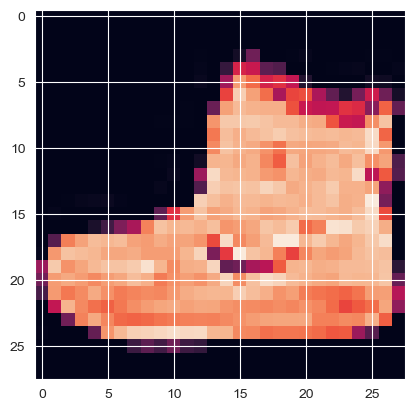

In [46]:
# In fact, the entire data pre-processing step is removed from this tutorial. When working with images
# in a datset you would need to convert them into xdimensional arrays containing the pixel values
plt.imshow(training_images[0])
print(training_images[0])

In [47]:
# normalization
training_images = training_images/ 255.0
test_images = test_images/ 255.0

**Designing the Model**
* *Sequential* defines a sequence of layers in the neural network
* *Flatten* takes a square and turns it into a one-dimensional vector
* *Dense* addas a layer of neurons
* *Activation* functions tell each layer of neurons what to do. There are lots of options, here are a few:
* *Relu* passes values of 0 or greater to the next layer
* *Softmax* passes the greatest value to the next layer


In [48]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [50]:
# Next step is to create the model, compiling it with an optimizer and loss function
# Afterwords, train the model on training data and labels. The model will try to find
# a relatinoship between the training data and its training labels
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images,training_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4959 - accuracy: 0.8261
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3732 - accuracy: 0.8652
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3356 - accuracy: 0.8781
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3122 - accuracy: 0.8857
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2933 - accuracy: 0.8915


The model figured out a pattern match between the image and the labels that worked 89% of the time

In [51]:
# Testing the mdoel on data it hasn't seen: the test set
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3476 - accuracy: 0.8748


[0.3475550413131714, 0.8748000264167786]

**Exploration Exercises!**

In [ ]:
classifications = model.predict(test_images)
print(classifications[0])